# When to use gradient-free optimizers

## Main message
Use gradient-free optimizers when the design space is noisy or discontinuous, there are multiple optima, the computational cost for the model is very low, or when you cannot efficiently compute derivatives.

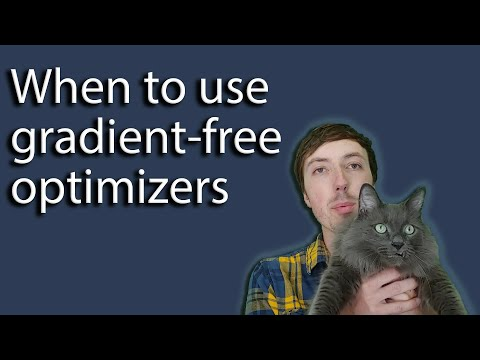

In [1]:
from IPython.display import YouTubeVideo; YouTubeVideo('G8omWx-T-KQ', width=1024, height=576)

## I strongly recommend using gradient-based methods
In general, gradient-based optimization methods are the most efficient way to explore your design space. There are some exceptions, which I'll cover in this lesson, but you should always aim to use gradient-based optimizers unless you have a really good set of reasons to do otherwise. If you don't think a gradient-based optimizer is right for your problem, there are probably approaches we can use to help you achieve an optimal answer using gradients, some of which are detailed here.

## Noisy and discontinuous design space
When you have a "noisy" design space, it means that the outputs change rapidly for a small change in the inputs. This noise might be caused by computational *or* physical reasons.

If it's due to computational reasons, it might make sense to try to decrease the noise by changing the way you're modeling or solving the system. One common source of noise in multidisciplinary systems is from not fully converging the coupling between disciplines. If your solver tolerance is too loose, the system can appear converged but is actually not converged sufficiently for numerical optimization methods. You might be able to simply decrease your solver tolerance to reduce noise.

However, some physical systems are inherently noisy. In this case, there's nothing on the computational side you can do short of changing how you're modeling the physics. You could choose to smooth out some of the noise, but that results in further approximation of your model, which may or may not be what you want.

Related to noise, but distinct, is the idea of discontinuity. If your model is either C0 or C1 discontinuous, gradient-free methods might make sense for you. C0 discontinuities mean that there are jumps in the design space. These might be caused by if-then conditions or discrete variables in your model or something else. C1 discontinuities mean that the derivative space is not smooth and continuous. This can occur through if-then conditions, model physics changing through the space, using non-smooth interpolants, and many other avenues.

Discontinuous design spaces naturally crop up when using discrete variables. For example, what are the derivatives for a wind turbine having two or three blades? 2.2 or 2.9 blades are not an option, so that's inherently introduces a discontinuity. The derivative doesn't exist for discrete variables.

So, having a noisy and discontinuous space might be a good reason to use a gradient-free optimizer due to the numerous issues that a gradient-based optimizer might encounter. This doesn't mean that you *have* to use a gradient-free method, just that it's a reasonable path forward.

## Multimodal problems
Gradient-free algorithms don't automatically solve multimodal problems better than gradient-based ones. That being said, there are a slew of gradient-free algorithms that are focused on global optimization, such as [DIRECT](https://link.springer.com/article/10.1007/s10898-020-00952-6), [ISRES](http://www3.hi.is/~tpr/papers/RuYa05.pdf), [particle swarm](https://en.wikipedia.org/wiki/Particle_swarm_optimization), and [evolutionary](https://en.wikipedia.org/wiki/Evolution_strategy) methods. Other gradient-free methods, like the [Nelder-Mead](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method) and [COBYLA](https://link.springer.com/chapter/10.1007/978-94-015-8330-5_4) are local algorithms in that they are not made to explore the global design space.

In some cases multimodality might suggest use of gradient-free methods, but it's often more efficient to use a gradient-based method with multiple starts to find the global optimum. You can easily set up a custom script in OpenMDAO to do this, or even outside of OpenMDAO Scipy has an [built-in method called basinhopping](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html) that does this.

## Very cheap models
If you're dealing with a model that is computationally cheap (it takes <1 second to analyze your model), you can probably use a gradient-free optimizer and be fine. Because your model is so inexpensive it'd be okay to use a large number of iterations. Additionally, it probably wouldn't be worth the developer time to compute or set up the derivative calculations to do gradient-based optimization because the model is so computationally cheap.

This is really only if the design space is quite small or does not have many dimensions (hundreds or thousands of design variables). Even if your model is dirt cheap, once you get to a complex enough design space then gradient-based methods will still be advantageous. That being said, there's still the trade-off between developer time and computational time that you have to weigh for your own needs.

## When you can't compute derivatives
Admittedly, it's generally developer time expensive to compute efficient derivatives for complex multidisciplinary models. If you want to get an optimization running without worrying about derivative computation of any sort, even FD or CS, you can just use gradient-free methods. But, it's probably better to use an approximation scheme, like FD or CS, coupled with a gradient-based method. 

Another great reason that you couldn't compute derivatives is if you're dealing with a discrete (integer-based) problem. These naturally crop up often in engineering, like the number of tickets sold for a flight, wheels on a car, blades on a turbine, structural members on a bridge, etc. Anything you count might be discrete. In these cases, a gradient-free method might be your best option. Or, another good (maybe better!) option is to do multiple gradient-based optimizations with different values of your discrete variables. I'd suggest doing that to save computational cost when finding optima. It might also be easier for designers to see trade-offs between discrete variables that way because the gradient-based methods generally converge to the local optima more tightly than gradient-free methods.